In [356]:
import pandas as pd
import numpy as np

In [357]:
models_test_gini_df = pd.read_csv('/home/kate/data/ClaimPrediction/t3_AllFeaturesInd/models_test_gini.csv', index_col=None)
models_train_gini_df = pd.read_csv('/home/kate/data/ClaimPrediction/t3_AllFeaturesInd/models_train_gini.csv', index_col=None)

In [358]:
Model1='scholasticdiscountind'
Model2='scholasticdiscountind_0.2'

In [359]:
Model1_test=models_test_gini_df[models_test_gini_df['Model']==Model1]
Model1_train=models_train_gini_df[models_train_gini_df['Model']==Model1]

In [360]:
Model2_test=models_test_gini_df[models_test_gini_df['Model']==Model2]
Model2_train=models_train_gini_df[models_train_gini_df['Model']==Model2]

In [361]:
import matplotlib.pyplot as plt
%matplotlib inline

Overfitting control: Model1 without encoding and Model2 with targeting encoding

In [362]:
#1.Building dataset with metrics at different Test/Train sizes
df_test1=Model1_test[['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']].iloc[[0]].transpose()
df_test1.columns=['TestGini1']
df_train1=Model1_train[['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']].iloc[[0]].transpose()
df_train1.columns=['TrainGini1']
df1=df_test1.join(df_train1)
df1.reset_index(inplace=True)
df1.columns=['Size','TestGini1','TrainGini1']
df1['Size']=df1.apply(lambda c: c.Size.replace('S', ''), axis=1)
df1['Size']=df1['Size'].apply(pd.to_numeric)
df1[Model1]=df1['TrainGini1'] - df1['TestGini1']
#
df_test2=Model2_test[['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']].iloc[[0]].transpose()
df_test2.columns=['TestGini2']
df_train2=Model2_train[['S0.45','S0.4','S0.35','S0.3','S0.25','S0.2','S0.15','S0.1']].iloc[[0]].transpose()
df_train2.columns=['TrainGini2']
df2=df_test2.join(df_train2)
df2.reset_index(inplace=True)
df2.columns=['Size','TestGini2','TrainGini2']
df2['Size']=df2.apply(lambda c: c.Size.replace('S', ''), axis=1)
df2['Size']=df2['Size'].apply(pd.to_numeric)
df2[Model2]=df2['TrainGini2'] - df2['TestGini2']
df=df1.join(df2, lsuffix='', rsuffix='2')
df.drop('Size2',1,inplace=True)

In [363]:
#2.Polynomial interpolation to see a trens
import numpy.polynomial.polynomial as poly
def polyfit(X,Y):
    coefs = poly.polyfit(X, Y, 1)
    return poly.polyval(X.tolist(), coefs)

In [364]:
df['TestGini1_p']=polyfit(df['Size'], df['TestGini1'])
df['TrainGini1_p']=polyfit(df['Size'], df['TrainGini1'])
df['TestGini2_p']=polyfit(df['Size'], df['TestGini2'])
df['TrainGini2_p']=polyfit(df['Size'], df['TrainGini2'])

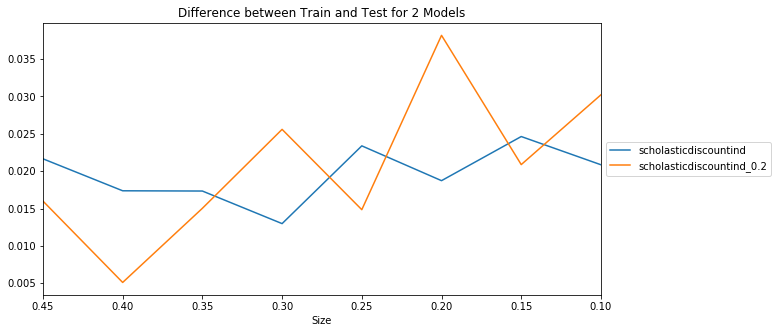

In [365]:
df.plot(x='Size', y=[Model1,Model2],figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Difference between Train and Test for 2 Models', color='black')

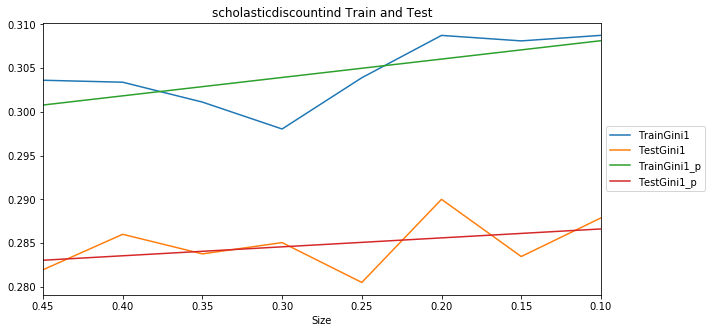

In [366]:
df.plot(x='Size', y=['TrainGini1','TestGini1','TrainGini1_p','TestGini1_p'],figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('%s Train and Test'%(Model1), color='black')

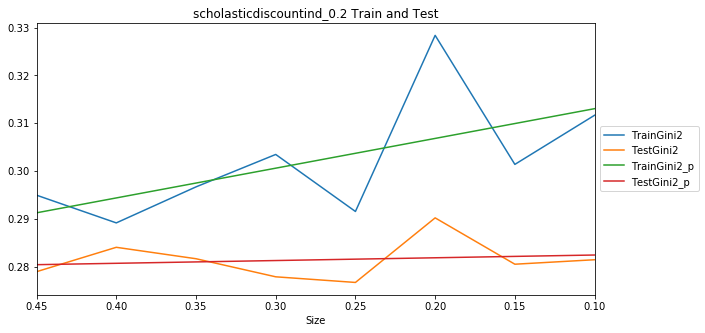

In [367]:
df.plot(x='Size', y=['TrainGini2','TestGini2','TrainGini2_p','TestGini2_p'],figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('%s Train and Test'%(Model2),color='black')

In [368]:
#5.Table
print(df)

   Size  TestGini1  TrainGini1  scholasticdiscountind  TestGini2  TrainGini2  \
0  0.45   0.281961    0.303615               0.021654   0.278957    0.294955   
1  0.40   0.286016    0.303391               0.017374   0.284055    0.289161   
2  0.35   0.283779    0.301120               0.017341   0.281665    0.296694   
3  0.30   0.285067    0.298047               0.012980   0.277883    0.303477   
4  0.25   0.280514    0.303901               0.023387   0.276704    0.291549   
5  0.20   0.290008    0.308738               0.018729   0.290212    0.328389   
6  0.15   0.283476    0.308111               0.024635   0.280518    0.301398   
7  0.10   0.287887    0.308744               0.020857   0.281455    0.311677   

   scholasticdiscountind_0.2  TestGini1_p  TrainGini1_p  TestGini2_p  \
0                   0.015999     0.283050      0.300783     0.280420   
1                   0.005106     0.283561      0.301833     0.280709   
2                   0.015029     0.284072      0.302883     0.2